# AIM: Build a machine learning model, that will be able to predict the risk of a heart attack based on a patient's health condition.Compare the Accuracy Result with different ML algorithms

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Load Dataset

In [2]:
df=pd.read_csv('heart.csv')

## Perform EDA

In [3]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.tail()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [5]:
df.shape

(303, 14)

In [6]:
df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [8]:
df.columns

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output'],
      dtype='object')

In [9]:
df.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [10]:
df.duplicated().sum() #check duplicated rows

1

In [11]:
df[df.duplicated]

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


In [12]:
df.drop_duplicates(inplace= True) #remove duplicted row

In [13]:
df.reset_index(drop=True,inplace=True) #droping original index and reseting again

In [14]:
df.shape

(302, 14)

## Detecting outliers

<Axes: >

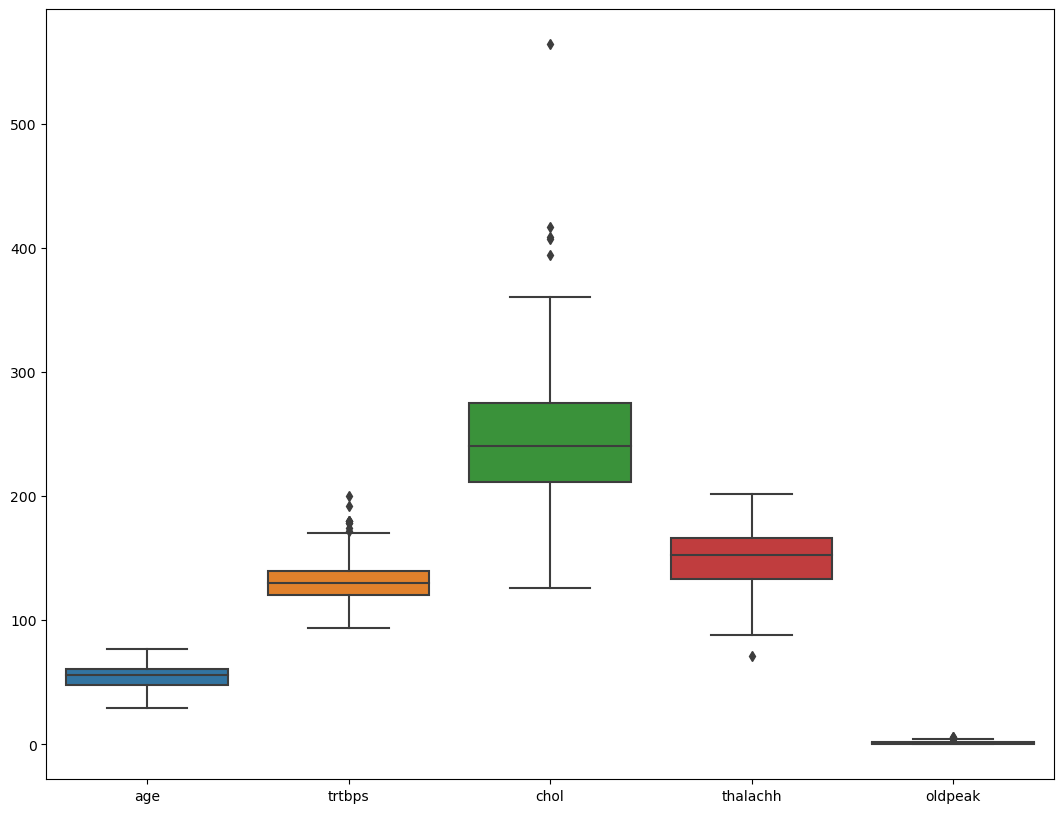

In [15]:
#By using Boxplot for numerical columns only
plt.figure(figsize=(13,10))
sns.boxplot(data=df[['age','trtbps','chol','thalachh','oldpeak']])

There are outliers in columns trtbps,chol,thalachh,oldpeak as seen from the boxplot.

In [16]:
#Find the outliers
def detectoutliers(data):
    data=sorted(data)
    outlier=[]
    lower=np.percentile(data,25)
    upper=np.percentile(data,75)
    IQR=upper-lower
    upperlimit=upper+(1.5*IQR)
    lowerlimit=lower-(1.5*IQR)
    print('upperlimit is : ',upperlimit)
    print('lowerlimit is : ',lowerlimit)
    for i in data:
        if (i<lowerlimit or i>upperlimit):
            outlier.append(i)
    return outlier


for i in df[['age','trtbps','chol','thalachh','oldpeak']] :
    outliers=detectoutliers(df[i])
    print("Outliers in",i,"attribute :", outliers)
    print('Total Number outliers in',i,':',len(outliers))

upperlimit is :  80.5
lowerlimit is :  28.5
Outliers in age attribute : []
Total Number outliers in age : 0
upperlimit is :  170.0
lowerlimit is :  90.0
Outliers in trtbps attribute : [172, 174, 178, 178, 180, 180, 180, 192, 200]
Total Number outliers in trtbps : 9
upperlimit is :  370.375
lowerlimit is :  115.375
Outliers in chol attribute : [394, 407, 409, 417, 564]
Total Number outliers in chol : 5
upperlimit is :  215.125
lowerlimit is :  84.125
Outliers in thalachh attribute : [71]
Total Number outliers in thalachh : 1
upperlimit is :  4.0
lowerlimit is :  -2.4000000000000004
Outliers in oldpeak attribute : [4.2, 4.2, 4.4, 5.6, 6.2]
Total Number outliers in oldpeak : 5


No outliers in age attribute

Outliers in trtbps attribute : 172, 174, 178, 178, 180, 180, 180, 192, 200

Outliers in chol attribute : 394, 407, 409, 417, 564

Outliers in thalachh attribute : 71

Outliers in oldpeak attribute : 4.2, 4.2, 4.4, 5.6, 6.2

In [17]:
#remove outliers by flooring and capping method
def handleoutlier(data):
    tenth_percentile=np.percentile(data,10)
    ninetieth_percentile=np.percentile(data,90)
    data=np.where(data<tenth_percentile, tenth_percentile,np.where(data>ninetieth_percentile,ninetieth_percentile,data))
    return data

for i in ['trtbps','chol','thalachh','oldpeak'] :
    df[i]=handleoutlier(df[i])
    print(df[i])


0      145.0
1      130.0
2      130.0
3      120.0
4      120.0
       ...  
297    140.0
298    110.0
299    144.0
300    130.0
301    130.0
Name: trtbps, Length: 302, dtype: float64
0      233.0
1      250.0
2      204.0
3      236.0
4      308.9
       ...  
297    241.0
298    264.0
299    193.0
300    188.4
301    236.0
Name: chol, Length: 302, dtype: float64
0      150.0
1      176.8
2      172.0
3      176.8
4      163.0
       ...  
297    123.0
298    132.0
299    141.0
300    116.0
301    174.0
Name: thalachh, Length: 302, dtype: float64
0      2.3
1      2.8
2      1.4
3      0.8
4      0.6
      ... 
297    0.2
298    1.2
299    2.8
300    1.2
301    0.0
Name: oldpeak, Length: 302, dtype: float64


<Axes: >

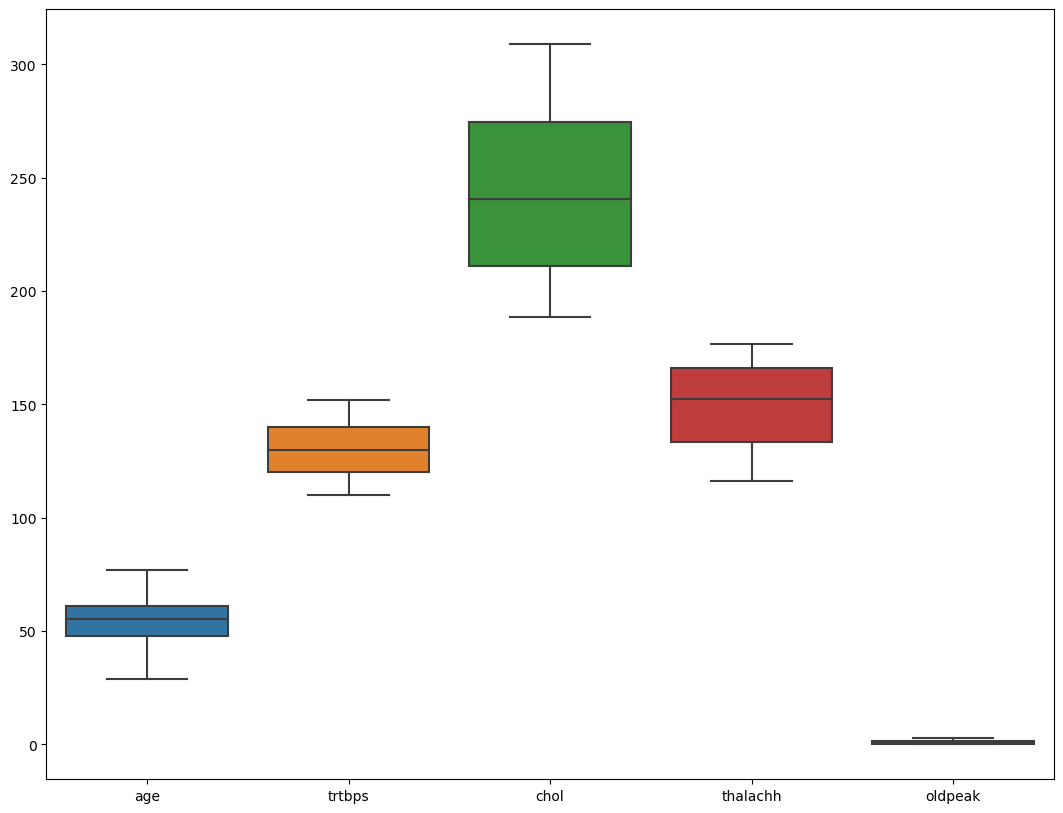

In [19]:
plt.figure(figsize=(13,10))
sns.boxplot(data=df[['age','trtbps','chol','thalachh','oldpeak']])

As seen from the box plot above, the outliers are removed.

## Visualization

In [20]:
df.columns

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output'],
      dtype='object')

Text(0.5, 1.0, 'Age distribution')

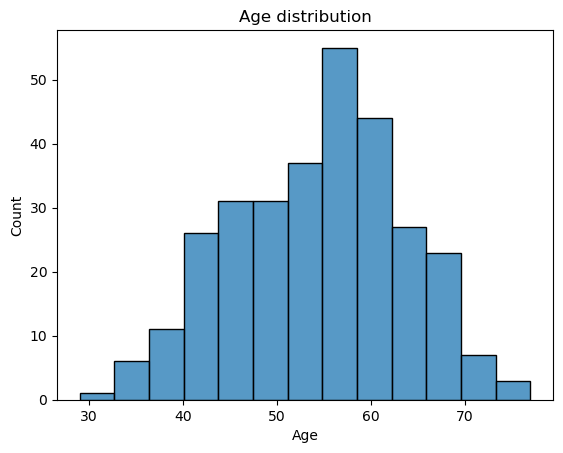

In [22]:
sns.histplot(df['age'])
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age distribution')

Text(0.5, 1.0, 'Gender wise chest pain distribution')

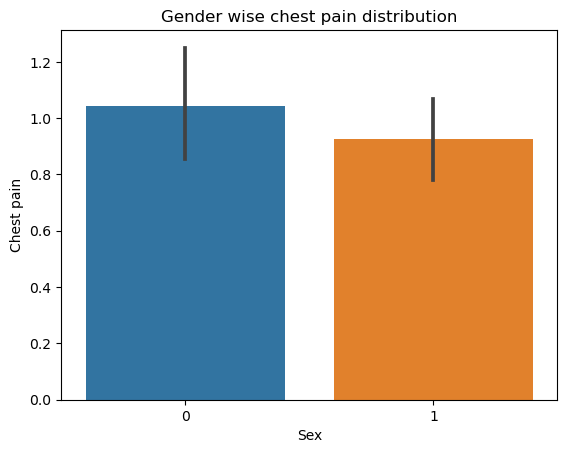

In [43]:
sns.barplot(x='sex',y='cp',data=df)
plt.xlabel('Sex')
plt.ylabel('Chest pain')
plt.title('Gender wise chest pain distribution')

0=Female

1=Male

In [46]:
df.sex.value_counts()

1    206
0     96
Name: sex, dtype: int64

Text(0.5, 1.0, 'Gender wise distribution')

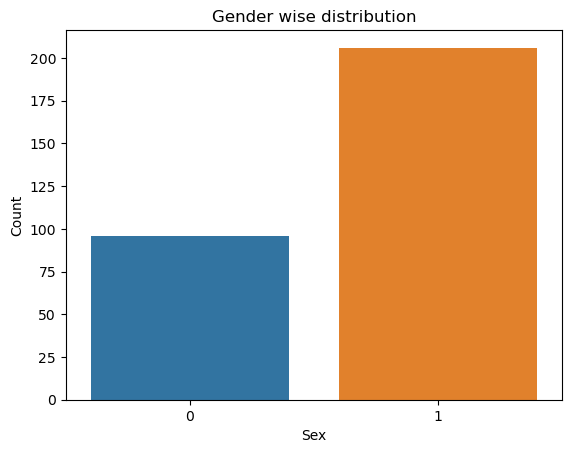

In [54]:
sns.countplot(x='sex',data=df)
plt.xlabel('Sex')
plt.ylabel('Count')
plt.title('Gender wise distribution')

Male    206

Female  96

Text(0.5, 1.0, 'Cholestrol Level wise distribution')

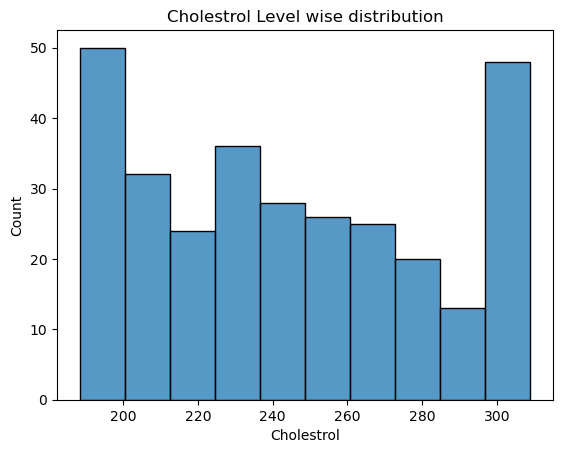

In [56]:
sns.histplot(df['chol'])
plt.xlabel('Cholestrol')
plt.ylabel('Count')
plt.title('Cholestrol Level wise distribution')

Total cholesterol (U.S. and some other countries)	Total cholesterol* (Canada and most of Europe)	Results
*Canadian and European guidelines differ slightly from U.S. guidelines. These conversions are based on U.S. guidelines.

Below 200 mg/dL	Below 5.2 mmol/L	Desirable


200-239 mg/dL	5.2-6.2 mmol/L	Borderline high


240 mg/dL and above	Above 6.2 mmol/L	High

Some patients have high number of Cholestrol levels

Text(0.5, 1.0, 'Chest pain wise data distribution')

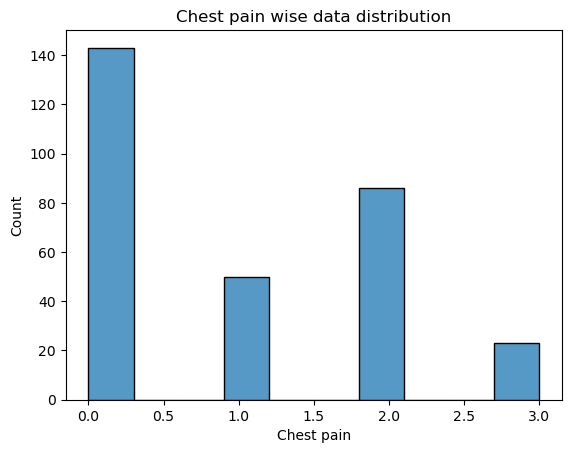

In [62]:
sns.histplot(df['cp'])
plt.xlabel('Chest pain')
plt.ylabel('Count')
plt.title('Chest pain wise data distribution')

1 = typical angina; 2 = atypical angina; 3 = non-anginal pain; 0 = asymptomatic

Almost a half of the patients have no pain in the chest

Text(0.5, 1.0, 'Correlation Plot')

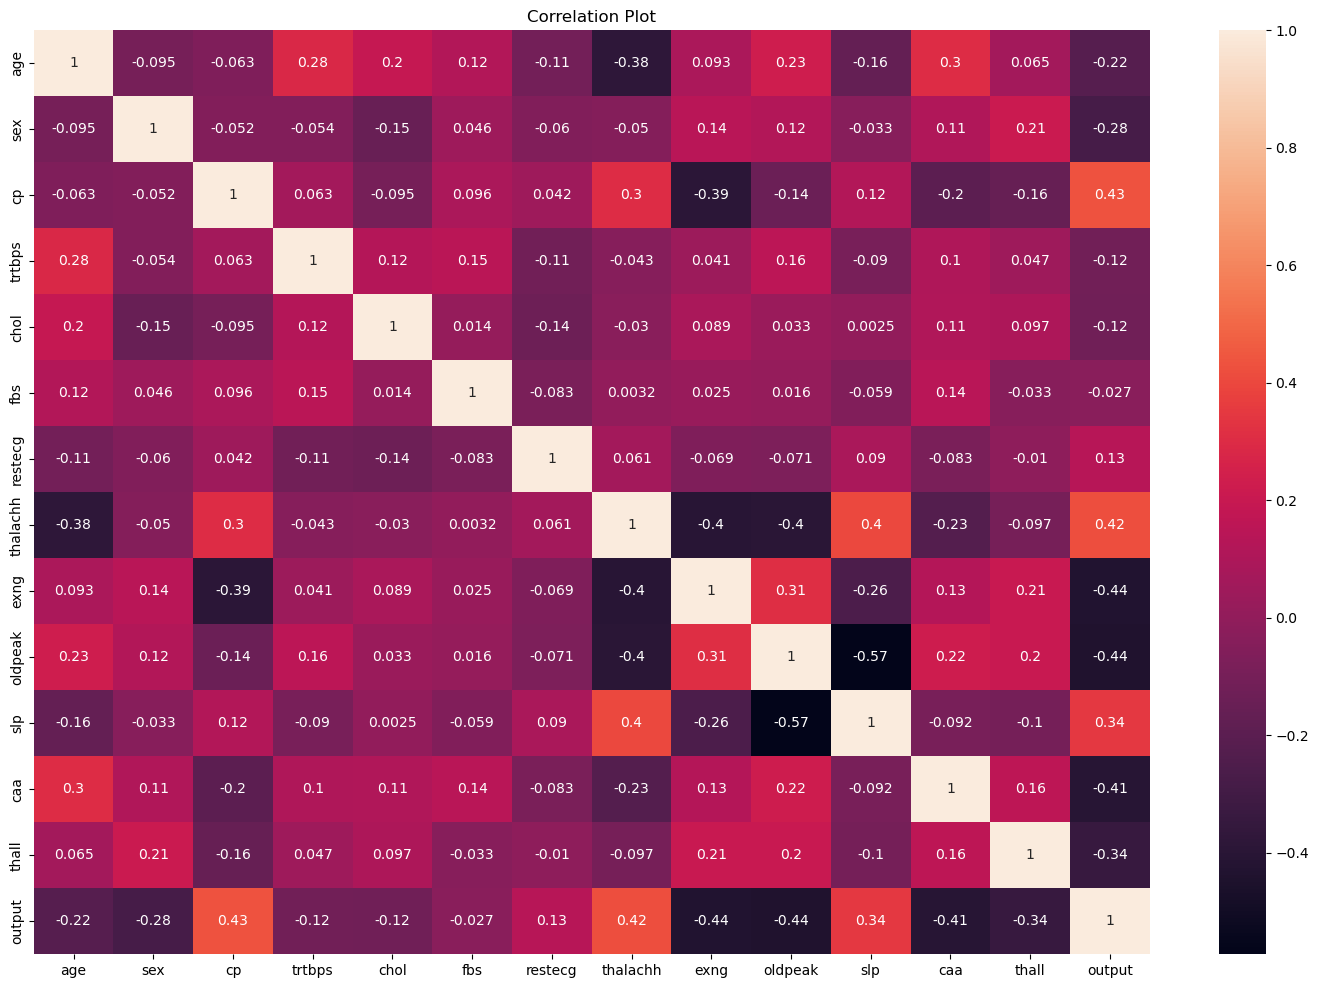

In [64]:
#Correlation 
plt.figure(figsize=(18,12))
sns.heatmap(df.corr(),annot=True)
plt.title('Correlation Plot')

Highly Correlated faetures as shown from heatmap are cp,thalachh,exng,oldpeak,caa

In [66]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145.0,233.0,1,0,150.0,0,2.3,0,0,1,1
1,37,1,2,130.0,250.0,0,1,176.8,0,2.8,0,0,2,1
2,41,0,1,130.0,204.0,0,0,172.0,0,1.4,2,0,2,1
3,56,1,1,120.0,236.0,0,1,176.8,0,0.8,2,0,2,1
4,57,0,0,120.0,308.9,0,1,163.0,1,0.6,2,0,2,1


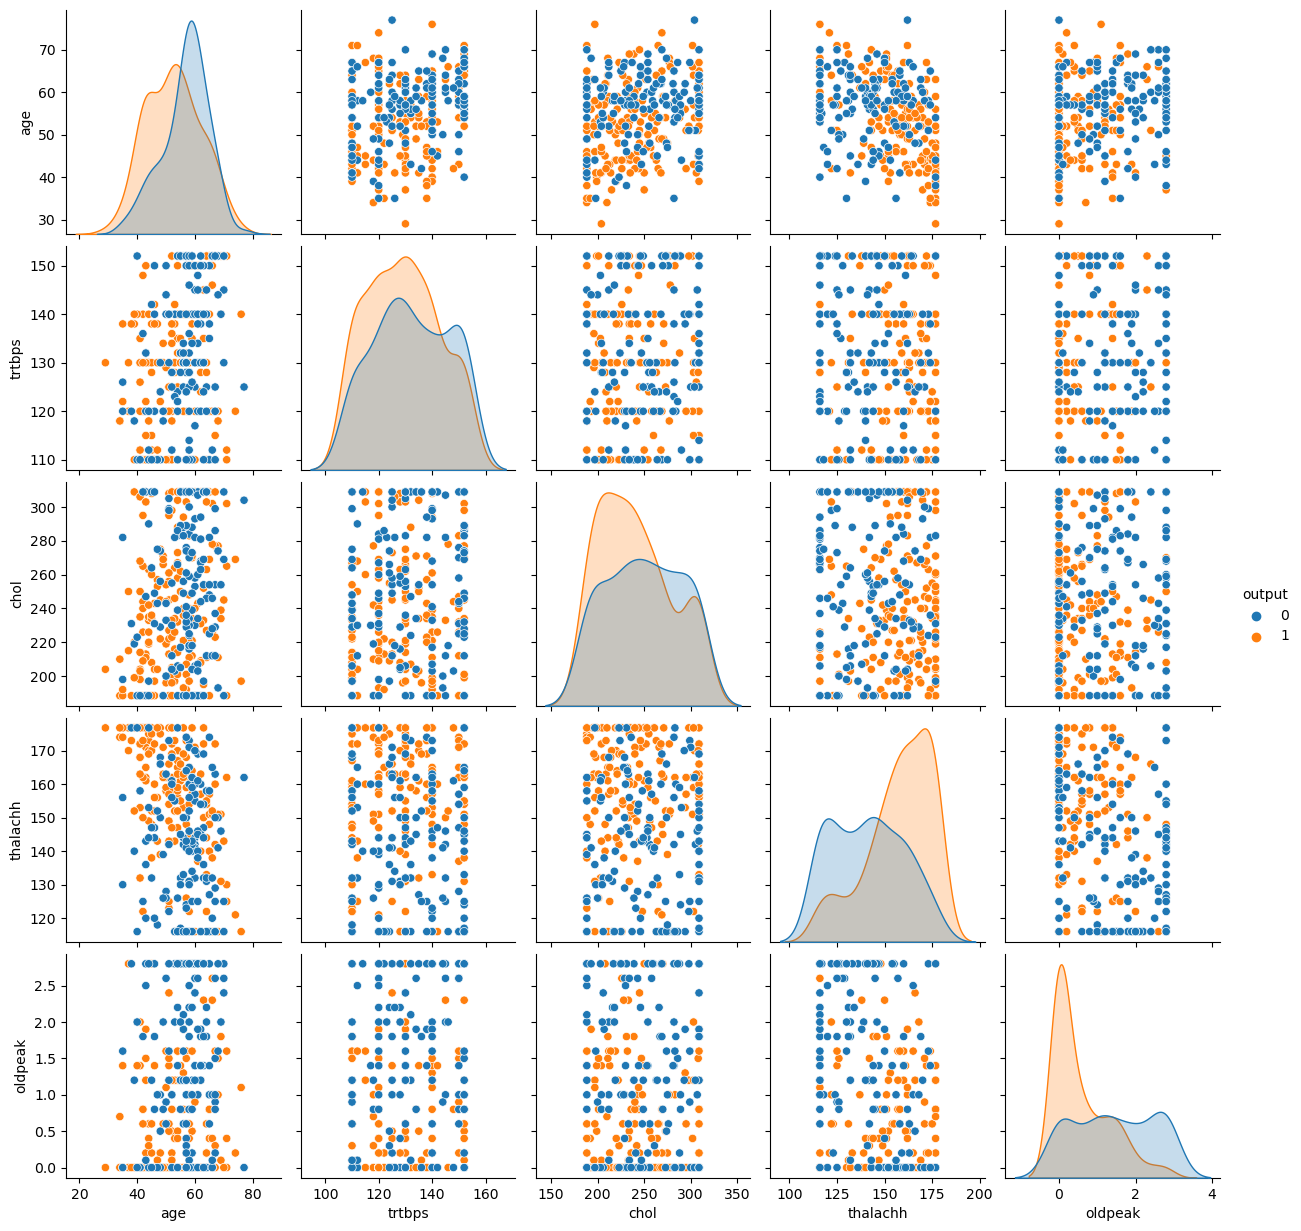

In [70]:
sns.pairplot(df[['age','trtbps','chol','thalachh','oldpeak','output']],hue='output')

The is no linear relationship between the numeical features as seen from the pairplot

## Feature Scaling

In [71]:
from sklearn.preprocessing import StandardScaler

In [72]:
df[['age','trtbps','chol','thalachh','oldpeak']]=StandardScaler().fit_transform(df[['age','trtbps','chol','thalachh','oldpeak']])

In [73]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,0.949794,1,3,1.064668,-0.298585,1,0,0.000372,0,1.367483,0,0,1,1
1,-1.928548,1,2,-0.038476,0.135392,0,1,1.369395,0,1.880247,0,0,2,1
2,-1.485726,0,1,-0.038476,-1.038899,0,0,1.124197,0,0.444509,2,0,2,1
3,0.174856,1,1,-0.773906,-0.222001,0,1,1.369395,0,-0.170808,2,0,2,1
4,0.285561,0,0,-0.773906,1.638995,0,1,0.664450,1,-0.375914,2,0,2,1


Numerical features are scaled as Standard Scaler to bring the values in a range

## Train and test Data preparation

In [75]:
from sklearn.model_selection import train_test_split

In [76]:
x=df[['age','sex','cp','trtbps','chol','fbs','restecg','thalachh','exng','oldpeak','slp','caa','thall']] #Feature variable
y=df.output   #target variable

In [78]:
#split the data for train and test
#train data-80%
#test data-20%
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.20,random_state=2)

In [80]:
xtrain.shape,xtest.shape,ytrain.shape,ytest.shape

((241, 13), (61, 13), (241,), (61,))

## Modelling

In [95]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBRFClassifier

from sklearn.metrics import accuracy_score,classification_report

In [136]:
LR=LogisticRegression()
LR.fit(xtrain,ytrain)  #training the model
ypred=LR.predict(xtest)  #testing the model

#printing accuracy and classification report
LR_Accuracy=accuracy_score(ytest,ypred)*100
print('Accuracy score of LR model is: ', accuracy_score(ytest,ypred))
print('Classification report of LR model is: \n',classification_report(ytest,ypred))

Accuracy score of LR model is:  0.8524590163934426
Classification report of LR model is: 
               precision    recall  f1-score   support

           0       0.96      0.76      0.85        33
           1       0.77      0.96      0.86        28

    accuracy                           0.85        61
   macro avg       0.87      0.86      0.85        61
weighted avg       0.87      0.85      0.85        61



In [135]:
SV=SVC().fit(xtrain,ytrain)  #training the model
ypred=SV.predict(xtest)  #testing the model

#printing accuracy and classification report
SV_Accuracy=accuracy_score(ytest,ypred)*100
print('Accuracy score of SV model is: ', accuracy_score(ytest,ypred))
print('Classification report of SV model is: \n',classification_report(ytest,ypred))

Accuracy score of SV model is:  0.8524590163934426
Classification report of SV model is: 
               precision    recall  f1-score   support

           0       1.00      0.73      0.84        33
           1       0.76      1.00      0.86        28

    accuracy                           0.85        61
   macro avg       0.88      0.86      0.85        61
weighted avg       0.89      0.85      0.85        61



In [134]:
DT= DecisionTreeClassifier(max_depth=10,criterion='entropy').fit(xtrain,ytrain)  #training the model
ypred=DT.predict(xtest)  #testing the model

#printing accuracy and classification report
DT_Accuracy=accuracy_score(ytest,ypred)*100
print('Accuracy score of DT model is: ', accuracy_score(ytest,ypred))
print('Classification report of DT model is: \n',classification_report(ytest,ypred))

Accuracy score of DT model is:  0.819672131147541
Classification report of DT model is: 
               precision    recall  f1-score   support

           0       0.89      0.76      0.82        33
           1       0.76      0.89      0.82        28

    accuracy                           0.82        61
   macro avg       0.83      0.83      0.82        61
weighted avg       0.83      0.82      0.82        61



In [133]:
RF= RandomForestClassifier(n_estimators=200,max_features=5,criterion='entropy').fit(xtrain,ytrain)  #training the model
ypred=RF.predict(xtest)  #testing the model

#printing accuracy and classification report
RF_Accuracy=accuracy_score(ytest,ypred)*100
print('Accuracy score of RF model is: ', accuracy_score(ytest,ypred))
print('Classification report of RF model is: \n',classification_report(ytest,ypred))

Accuracy score of RF model is:  0.8524590163934426
Classification report of RF model is: 
               precision    recall  f1-score   support

           0       0.96      0.76      0.85        33
           1       0.77      0.96      0.86        28

    accuracy                           0.85        61
   macro avg       0.87      0.86      0.85        61
weighted avg       0.87      0.85      0.85        61



In [131]:
GB= GradientBoostingClassifier(n_estimators=100,max_depth=10).fit(xtrain,ytrain)  #training the model
ypred=GB.predict(xtest)  #testing the model

#printing accuracy and classification report
GB_Accuracy=accuracy_score(ytest,ypred)*100
print('Accuracy score of GB model is: ', accuracy_score(ytest,ypred))
print('Classification report of GB model is: \n',classification_report(ytest,ypred))

Accuracy score of GB model is:  0.8360655737704918
Classification report of GB model is: 
               precision    recall  f1-score   support

           0       0.90      0.79      0.84        33
           1       0.78      0.89      0.83        28

    accuracy                           0.84        61
   macro avg       0.84      0.84      0.84        61
weighted avg       0.84      0.84      0.84        61



In [132]:
NB= GaussianNB().fit(xtrain,ytrain)  #training the model
ypred=NB.predict(xtest)  #testing the model
#printing accuracy and classification report
NB_Accuracy=accuracy_score(ytest,ypred)*100
print('Accuracy score of NB model is: ', accuracy_score(ytest,ypred))
print('Classification report of NB model is: \n',classification_report(ytest,ypred))

Accuracy score of NB model is:  0.8524590163934426
Classification report of NB model is: 
               precision    recall  f1-score   support

           0       0.90      0.82      0.86        33
           1       0.81      0.89      0.85        28

    accuracy                           0.85        61
   macro avg       0.85      0.86      0.85        61
weighted avg       0.86      0.85      0.85        61



In [129]:
XG= XGBRFClassifier(n_estimators=50,max_depth=5).fit(xtrain,ytrain)  #training the model
ypred=XG.predict(xtest)  #testing the model
#printing accuracy and classification report
XG_Accuracy=accuracy_score(ytest,ypred)*100
print('Accuracy score of XG model is: ', accuracy_score(ytest,ypred))
print('Classification report of XG model is: \n',classification_report(ytest,ypred))

Accuracy score of XG model is:  0.8360655737704918
Classification report of XG model is: 
               precision    recall  f1-score   support

           0       0.93      0.76      0.83        33
           1       0.76      0.93      0.84        28

    accuracy                           0.84        61
   macro avg       0.85      0.84      0.84        61
weighted avg       0.85      0.84      0.84        61



In [154]:
x=['LR','SVM','DT','RF','GB','NB','XG']
y=[LR_Accuracy,SV_Accuracy,DT_Accuracy,RF_Accuracy,GB_Accuracy,NB_Accuracy,XG_Accuracy]
Accuracy_result=dict(zip(x,y))
Accuracy_result


{'LR': 85.24590163934425,
 'SVM': 85.24590163934425,
 'DT': 81.9672131147541,
 'RF': 85.24590163934425,
 'GB': 83.60655737704919,
 'NB': 85.24590163934425,
 'XG': 83.60655737704919}

Text(0.5, 1.0, 'Accuracy statistics of different models')

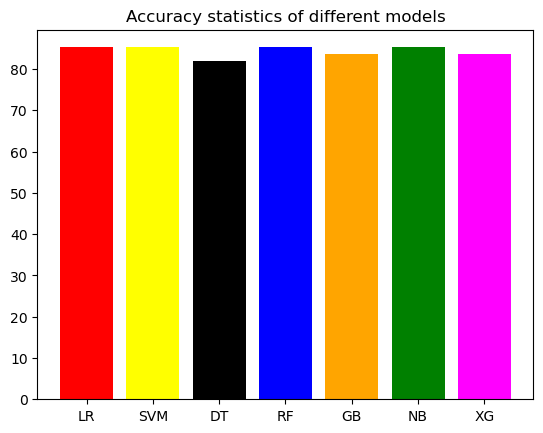

In [156]:
c=['red', 'yellow', 'black', 'blue', 'orange','green','magenta']
plt.bar(x,y,color=c)
plt.title('Accuracy statistics of different models')

The accuracy of the model from LR,SVM,RF and NB is maximum upto 85.25%